### Introduction

This notebook is an analysis of the Crowdflower labels of 1,000 revisions of Wikipedia talk pages by users who have been blocked for personal harassment. These revisions are chosen from neighbourhoods of various distance from a block event. This dataset has been cleaned and filtered to remove common administrator messages. These datasets are annotated via crowdflower to measure friendliness, aggressiveness and whether the comment constitutes a personal attack.

On Crowdflower, each revision is rated 7 times. The raters are given three questions:

1. Is this comment not English or not human readable?
    * Column 'na'
2. How aggressive or friendly is the tone of this comment? 
    * Column 'how_aggressive_or_friendly_is_the_tone_of_this_comment'
    * Ranges from '---' (Very Aggressive) to '+++' (Very Friendly)
3. Does the comment contain a personal attack or harassment? Please mark all that apply:
    * Column 'is_harassment_or_attack'
    * Users can specify that the attack is:
        * Targeted at the recipient of the message (i.e. you suck). ('recipent')
        * Targeted at a third party (i.e. Bob sucks). ('third_party')
        * Being reported or quoted (i.e. Bob said Henri sucks). ('quoting')
        * Another kind of attack or harassment. ('other')
        * This is not an attack or harassment. ('not_attack')
    
Below, we plot histograms of the units by average rating of each of the questions, examine quantiles of answers, and compute inter-annotator agreement. We also study whether or not there is a change in aggressiveness before and after a block event.

### Loading packages and data

In [1]:
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from crowdflower_analysis import *
from krippendorf_alpha import *

In [2]:
pd.set_option('display.max_colwidth', 1000)

In [3]:
attack_columns = ['not_attack', 'other', 'quoting', 'recipient', 'third_party']
aggressive_columns = ['-3', '-2', '-1', '0', '1', '2', '3']

In [4]:
grouped_dat = {
    '5': preprocess('annotated_onion_layer_5_rows_0_to_10000_first_1000.csv'),
    '10': preprocess('annotated_onion_layer_10_rows_0_to_1000.csv'),
    '20': preprocess('annotated_onion_layer_20_rows_0_to_1000.csv'),
    '30': preprocess('annotated_onion_layer_30_rows_0_to_1000.csv')
}

### Plot histogram of average ratings by revision

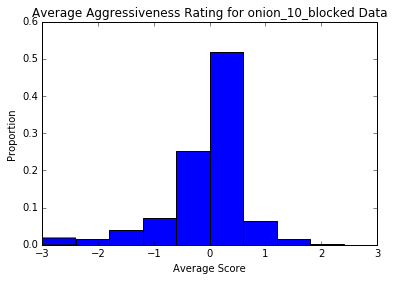

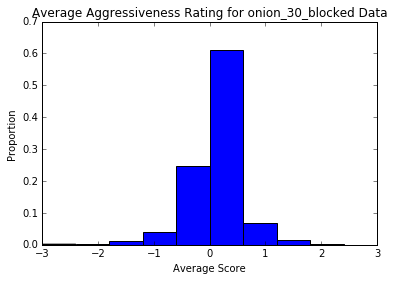

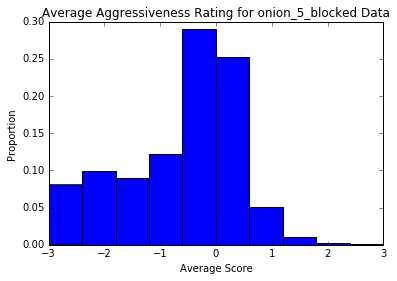

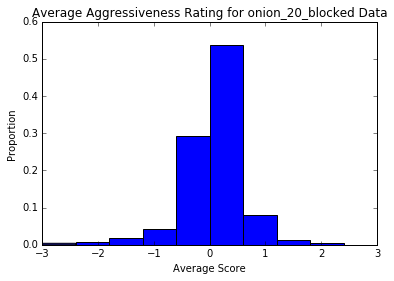

In [5]:
bins = np.linspace(-3,3,11)
for key in grouped_dat.keys():
    hist_comments(grouped_dat[key], bins, 'aggression_score', 'Average Aggressiveness Rating for onion_%s_blocked Data' % key)

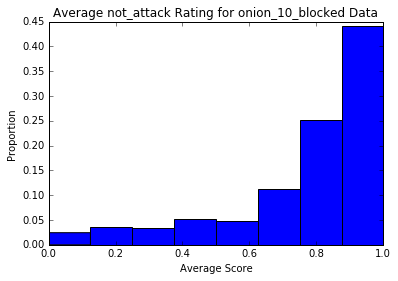

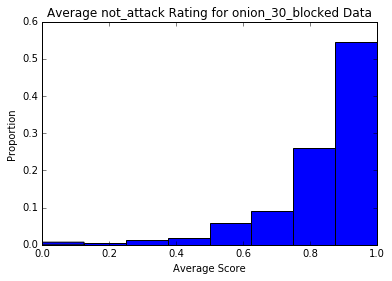

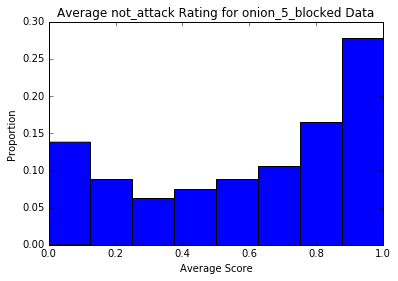

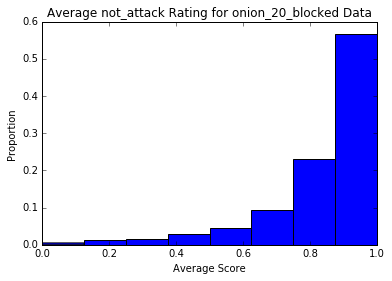

In [6]:
bins = np.linspace(0,1,9)
col = 'not_attack'
for key in grouped_dat.keys():
    hist_comments(grouped_dat[key], bins, col, 'Average %s Rating for onion_%s_blocked Data' % (col, key))

### Inter-Annotator Agreement

In [7]:
from krippendorf_alpha import *

In [8]:
for key in grouped_dat.keys():
    print "Krippendorf's Alpha (aggressiveness) for layer %s: " % key
    print Krippendorf_alpha(grouped_dat[key], aggressive_columns, distance = interval_distance)
    print "Krippendorf's Alpha (attack) for layer %s: " % key
    print Krippendorf_alpha(grouped_dat[key], ['not_attack_0', 'not_attack_1'])

Krippendorf's Alpha (aggressiveness) for layer 10: 
0.406532039469
Krippendorf's Alpha (attack) for layer 10: 
0.341846868515
Krippendorf's Alpha (aggressiveness) for layer 30: 
0.25127377955
Krippendorf's Alpha (attack) for layer 30: 
0.20087127639
Krippendorf's Alpha (aggressiveness) for layer 5: 
0.581927357756
Krippendorf's Alpha (attack) for layer 5: 
0.484279405223
Krippendorf's Alpha (aggressiveness) for layer 20: 
0.311832403035
Krippendorf's Alpha (attack) for layer 20: 
0.239889896222


### Selected harassing and aggressive revisions by quartile

We look at a sample of revisions whose average aggressive score falls into various quantiles. This allows us to subjectively evaluate the quality of the questions that we are asking on Crowdflower.

In [9]:
key = '20'

In [10]:
# Most aggressive comments
sorted_comments(grouped_dat[key], 'aggression_score', 0, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
391,"OMFG, I SENT YOU A F***ING MESSAGE SAYING I WASN'T VANDALIZING, I WAS CITING MY SOURCES FOR YOU! NOW UNBLOCK ME OR I'LL KILL YOU, I F***ING SWEAR TO GOD!",-2.714286,0.000000,0.000000,0,1.000000,0.000000
181,"Hey, fuck off. The Sess got everything that he deserved in his talk page. He insulted me first. Keep your nose out of my business, faggot.",-2.714286,0.000000,0.000000,0,0.857143,0.285714
263,"Klptyzm, The Haunted Angel and Johnnyfog can go suck a dick and go to hell ya prick motherucker cocksuckers.",-2.714286,0.000000,0.000000,0,0.571429,0.428571
1,"And do you think I give a flying fuck what some eurotrash asshole thinks? 05:34, Mar 26, 2005 (UTC)",-2.428571,0.142857,0.142857,0,0.857143,0.142857
538,"You gonna block me, huh? Go on ahead I'll have a new I.P. Address next time anyway you fuckrag piece of shit.",-2.285714,0.142857,0.000000,0,0.857143,0.000000


In [11]:
# Median aggressive comments
sorted_comments(grouped_dat[key], 'aggression_score', 0.5, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
326,""" Here's a good one: Wikipedia actually thinks it can fix this with a """"trusted editor"""" system. Folks, when you put children in power in an organization founded by a 38-year-old going on 16, there isn't anyone to trust the trusters.""",0,0.714286,0.142857,0,0,0.142857
101,"10:37, 15 May 2006 (UTC)",0,0.857143,0.000000,0,0,0.000000
322,", 21 September 2007 (UTC)\nSee #6. (talk•contribs) 11:52",0,1.000000,0.000000,0,0,0.000000
321,BB8 AP\nDo you want me to do it? Redirect it to the Big Brother 8 (US) page? Talk,0,1.000000,0.000000,0,0,0.000000
319,"You're doing something special with that link right there, aren't you?",0,1.000000,0.000000,0,0,0.000000


In [12]:
# Least aggressive comments
sorted_comments(grouped_dat[key], 'aggression_score', 0, 5, False)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
996,"""\n\nThanks and Merry Xmas to you too! """,2.000000,1.000000,0.000000,0,0,0
157,"Welcome!\n\nHello, , and welcome to Wikipedia! Thank you for your contributions. I hope you like the place and decide to stay. Here are some pages that you might find helpful:\nThe five pillars of Wikipedia\nHow to edit a page\nHelp pages\nTutorial\nHow to write a great article\nManual of Style\nI hope you enjoy editing here and being a Wikipedian! Please sign your name on talk pages using four tildes (~~~~); this will automatically produce your name and the date. If you need help, check out Wikipedia:Questions, ask me on my talk page, or place {{helpme}} on your talk page and someone will show up shortly to answer your questions. Again, welcome! \n\nPlease take a look at WP:AUTO. Thanks. - talk/email",2.000000,0.857143,0.142857,0,0,0
831,"""\n\nOkay, thank you very much Qwyrxian! I will listen to all the advice i am given. (talk✉) """,2.000000,1.000000,0.000000,0,0,0
637,"""\n\nWelcome!\n\nHello, Whooyeah, and welcome to Wikipedia! Thank you for your contributions. I hope you like the place and decide to stay. Here are some pages that you might find helpful:\nThe five pillars of Wikipedia\nTutorial\nHow to edit a page and How to develop articles\nHow to create your first article (using the Article Wizard if you wish)\nManual of Style\nI hope you enjoy editing here and being a Wikipedian! Please sign your messages on discussion pages using four tildes (~~~~); this will automatically insert your username and the date. If you need help, check out Wikipedia:Questions, ask me on my talk page, or ask your question on this page and then place {{helpme}} before the question. Again, welcome! (mailbox) 01:54, 11 May 2010 (UTC)""",1.857143,1.000000,0.000000,0,0,0
754,"""\n Yes, I understand and it was wrong to ask you. You have been very good to me, and we've come a long way together at Claddagh ring. No worries. You are a good """"WikiFriend"""" and always were. You know, I guess for me, there are no quiet corners here.... imacowboy """,1.857143,1.000000,0.000000,0,0,0


### Selected revisions on multiple questions

In this section, we examine a selection of revisions by their answer to Question 3 and sorted by aggression score. Again, this allows us to subjectively evaluate the quality of questions and responses that we obtain from Crowdflower.

In [13]:
# Most aggressive comments which are labelled 'This is not an attack or harassment.'
sorted_comments(grouped_dat[key][grouped_dat[key]['not_attack'] > 0.6], 'aggression_score', 0, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
367,"""\n\n lol \n\nIf you call freedom of speech and rights to believs """"hate"""" and """"antisemitism"""" you have go to the doctor. I will not argue with you anymore because I will not waste anymore of my time.\n\n """,-0.857143,0.857143,0.000000,0.000000,0.285714,0.000000
646,"Well, I chose to act like a man, instead of a candy ass. That's why I didn't go to ANI earlier. I said nothing about editing anonymously. If I do decide to do that, I will clearly state who I am, what I'm doing, and why I need to use that method of editing.Mk5384",-0.714286,0.714286,0.428571,0.142857,0.142857,0.142857
483,And you hate pakistan so whats the difference ? 81.151.101.146,-0.714286,0.714286,0.142857,0.000000,0.285714,0.000000
279,"More hypocracy. The 7th AfD nomination of Eep (you look it up since you deleted all the work I did) stated the info about the WildEep! sound would be added to the Mac System 7 article. However, that info was promptly removed soon after it was added, and expanded upon. This is ridiculous hypocracy. Other people have info about their name/interests on their user page so why not me? Sheesh! You had no right to just mindlessly delete my user page without stating a dispute with it first. - 02:47, 12 May 2007 (UTC)",-0.714286,0.714286,0.142857,0.000000,0.285714,0.000000
255,"okay \n\ni was told via jimbo in email that i can delete user talk page all I want. are you now trying to tell me i cannot? i am being harass by many person on here, over a content waring. i speak greek, you speak greek, we talk greek. read this okay you see true. warning not right, they read by jimbo who say they not right, i am block for because 1 admin like actress, is big fan, he block me because i not agree. is not right use block to win war.\n\n",-0.714286,0.714286,0.000000,0.000000,0.285714,0.285714


In [14]:
# Most aggressive comments which are labelled 'Being reported or quoted (i.e. Bob said Henri sucks).'
sorted_comments(grouped_dat[key][grouped_dat[key]['quoting'] > 0.3], 'aggression_score', 0, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party


In [15]:
# Most aggressive comments which are labelled 'Targeted at a third party (i.e. Bob sucks).'
sorted_comments(grouped_dat[key][grouped_dat[key]['third_party'] > 0.5], 'aggression_score', 0, 5)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
862,Editorial sponsored bullshit.,-2.285714,0.000000,0.285714,0.000000,0.142857,0.714286
781,"""\nI can't decide if the new users at that RfC are deliberately trolling or really that stupid. Either way, they're purely disruptive and their foolish shallow blather has effectively shut out any rational discussion. What other project would allow a bunch of unknown """"newbies"""" to rush into an important discussion and shut it down like that? """,-1.142857,0.285714,0.142857,0.000000,0.000000,0.571429
851,"the govmnt is a poor owner, how many art saved from trash? moreover",-1.000000,0.428571,0.142857,0.285714,0.000000,0.714286
886,"Well, some of them are definitely sockpuppets, but this isn't so much telepathy as meat puppetry. They're canvassing off-wiki to pile on me all at once. It's against the rules but since when do the bad guys follow rules when it doesn't suit them? This sort of ganging up is just what they do when someone pisses them off. It's how they keep Wikipedia clean of impartiality.",-1.000000,0.428571,0.000000,0.000000,0.000000,0.571429
845,"Thank you and from his lengthy responses, it seems he can't leave enough alone and he's very much inflexible about his precious plot summary being adjusted to fit the actual story. He proclaims to have worked so hard to improve the article when his reverts are basically trying to tell people he owns the article. What nonsense. Consider him a member of an alliance against me.",-0.571429,0.571429,0.000000,0.000000,0.000000,0.571429


In [16]:
# Least aggressive comments which are NOT labelled 'This is not an attack or harassment.'
sorted_comments(grouped_dat[key][grouped_dat[key]['not_attack'] < 0.5], 'aggression_score', 0, 5, False)

,clean_diff,aggression_score,not_attack,other,quoting,recipient,third_party
786,"Thank you! \n\nĊọ3ụṛċė3ḷḷ3ẹ1ṣ, y02ou are an arrogant ṣ245345h25245i2452454t. Did you thi7nk you could stop that qui7ckly? Oh, and you can say thanks to the Wikipedia cheatsheet for 7me? Now, ᵮ294543525234u7435535345345c235235234234234234k o35345344f22453452457f. 20:44, 18 May 2012 (UTC)",0.142857,0.428571,0.000000,0.000000,0.285714,0.000000
210,"Mein lieber Brendel, Ich bin auch deutscher Herkunft. Mein Vater ist Deutsch, meine Mutter aus Spanien. Ich meine die Nazi-Germanisten, nicht die Deutschen.",-0.142857,0.285714,0.285714,0.000000,0.000000,0.000000
434,"""\nDurova, I find your activities in continually trying to smear me offensive and my comment at the FAC reflects that feeling. I am asking you to stop. In this thread please either accept or decline my request or propose an alternate. I am not offering tit-for-tat on the two comments. I am asking you to stop your long-running campaign against me and to signal that by striking your comment. Then you will perhaps deserve the simple courtesies you consistently deny me, in my case the """"courtesy"""" of allowing me to post my comments without you harassing me. Thanks. 02:16, 6 May 2008 (UTC)""",-0.285714,0.428571,0.000000,0.285714,0.285714,0.142857
441,Jews chosing their own hangman,-0.428571,0.428571,0.428571,0.000000,0.000000,0.285714
636,"This Edit \n\nMy good friend, I was actually referring to this edit: \n\nNote the canvassing here, here, here, here...probably more but no need to keep looking. I can't believe this pissant is still bothering the adults. A review of his contribs show that he is at best, trifling. His motivations which are completely incorrect can be seen here.\nEither get a clue or get out. You are distracting the productive & constructive editors with your trifling. Talk about disruptive....\n⋙–Berean–Hunter—► ((⊕)) 20:34, 9 May 2010 (UTC)\n\nI consider this a personal attack. 22:14, 9 May 2010 (UTC)",-0.571429,0.285714,0.142857,0.142857,0.285714,0.142857


### T-Test of Aggressiveness

We explore whether aggressiveness changes in the tone of comments from immediately before a block event to immediately after.

The mean aggressiveness before a block event:
aggression_score   -0.143763
dtype: float64
The mean aggressiveness after a block event: 
aggression_score    0.0589
dtype: float64
The results of a t-test
Ttest_indResult(statistic=array([-3.94795494]), pvalue=array([  8.78357573e-05]))


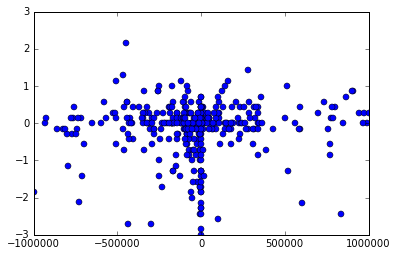

In [12]:
plot_and_test_aggressiveness(grouped_dat['10'])